In [1]:
import torch
import torchaudio
from sklearn.model_selection import train_test_split
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
keys = "_-!'(),.:;? abcdefghijklmnopqrstuvwxyz"

def text_encode(text):
    return [keys.index(i) for i in text.lower() if i in keys]

print(text_encode("Hi my name is Luke"))

[19, 20, 11, 24, 36, 11, 25, 12, 24, 16, 11, 20, 30, 11, 23, 32, 22, 16]


In [3]:
bundle = torchaudio.pipelines.TACOTRON2_WAVERNN_CHAR_LJSPEECH
processor = bundle.get_text_processor()
tacotron = bundle.get_tacotron2().to(device="cpu")


Downloading: "https://download.pytorch.org/torchaudio/models/tacotron2_english_characters_1500_epochs_wavernn_ljspeech.pth" to /Users/lukehoward/.cache/torch/hub/checkpoints/tacotron2_english_characters_1500_epochs_wavernn_ljspeech.pth


100.0%


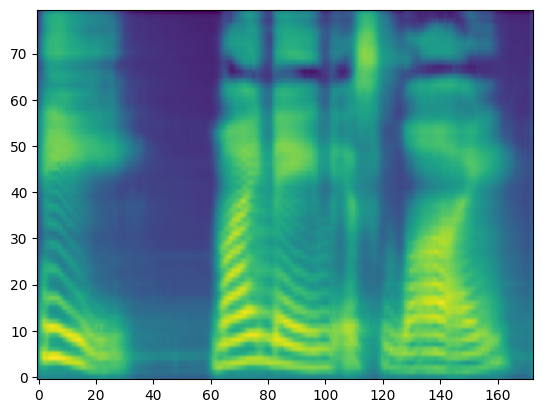

In [5]:
text = "Hi, my name is Luke"

with torch.inference_mode():
    processed, lengths = processor(text)
    spec,_,_ = tacotron.infer(processed,lengths)

_ = plt.imshow(spec[0].cpu().detach(),origin="lower", aspect="auto")